#### 악성사이트 탐지 머신러닝 모델링

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# 중복 데이터 처리
train = train.drop_duplicates()
train = train.reset_index(drop= True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

In [4]:
# label_binary columns 생성
train['label_binary'] = train['label'].copy()

In [5]:
# 'benign'는 0으로, 'malicious'는 1로 변경
train['label_binary'] = train['label_binary'].replace(['benign', 'malicious'], [0, 1])
train['label_binary'].unique()

array([1, 0], dtype=int64)

In [6]:
# 결측치 처리 -> 결측치 하나라 제거
train = train.dropna(axis = 0)
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [7]:
# 상관관계확인 후 불필요한 변수 제거
cols = ["url_ip_present", "url_chinese_present","url_port",
            "html_num_tags('embed')","html_num_tags('head')",
            "html_num_tags('body')","html_num_tags('applet')", 'label']

train = train.drop(cols, axis = 1)
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,0.0,321.0,0


In [8]:
target = 'label_binary'

x = train.drop(target, axis = 1)
y = train.loc[:, target]

In [9]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state= 2023)

In [89]:
# 1. import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

- Random Forest

In [69]:
# 선언하기
model = RandomForestClassifier(max_depth = 5, random_state= 2023)

In [70]:
# 학습하기
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=5, random_state=2023)

In [71]:
# 예측하기
y_pred = model.predict(val_x)

In [72]:
# 평가하기
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))

[[300  18]
 [ 23 306]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       318
           1       0.94      0.93      0.94       329

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



- XGBoost

In [73]:
# 선언하기
model_xgb = XGBClassifier(max_depth = 7, random_state = 2023)

In [74]:
# 학습하기
model_xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2023, ...)

In [75]:
# 예측하기
y_pred = model.predict(val_x)

In [76]:
# 평가하기
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))

[[300  18]
 [ 23 306]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       318
           1       0.94      0.93      0.94       329

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



- LightGBM

In [85]:
# 선언하기
model = LGBMClassifier(max_depth= 5, random_state= 2023, verbose = -1)

In [86]:
# 학습하기
model.fit(train_x, train_y)

LGBMClassifier(max_depth=5, random_state=2023, verbose=-1)

In [87]:
# 예측하기
y_pred = model.predict(val_x)

In [88]:
# 평가하기
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))

[[300  18]
 [ 14 315]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       318
           1       0.95      0.96      0.95       329

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



- Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
train_x_s = scaler.transform(train_x)
val_x_s = scaler.transform(val_x)

- KNN

In [31]:
model = KNeighborsClassifier(n_neighbors = 5)

In [32]:
model.fit(train_x_s, train_y)

KNeighborsClassifier()

In [33]:
y_pred = model.predict(val_x_s)

In [34]:
# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))

[[278  40]
 [ 33 296]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       318
           1       0.88      0.90      0.89       329

    accuracy                           0.89       647
   macro avg       0.89      0.89      0.89       647
weighted avg       0.89      0.89      0.89       647



##### 성능평가

- KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# 기본 모델 선언
model_dt = KNeighborsClassifier(n_neighbors = 5)

# 파라미터 지정
param = {'n_neighbors' : range(1, 50)}

# 모델 선언
model = GridSearchCV(model_dt,
                                    param,
                                    cv = 5,
                                    scoring = 'f1')

In [37]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1')

In [38]:
# 최적 파라미터, 예측 최고 성능
print('최적의 파라미터 :', model.best_params_)
print('예측 최고 성능 :', model.best_score_)

최적의 파라미터 : {'n_neighbors': 1}
예측 최고 성능 : 0.8835163710405471


- Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
# 기본 모델 선언
model_dt = RandomForestClassifier(max_depth = 5, random_state= 2023)

# 파라미터 지정
param = {'max_depth' : range(1, 50),
               'n_estimators' : [10]}

# 모델 선언
model = GridSearchCV(model_dt,
                                    param,
                                    cv = 5,
                                    scoring = 'f1')

In [46]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=2023),
             param_grid={'max_depth': range(1, 50), 'n_estimators': [10]},
             scoring='f1')

In [47]:
# 최적 파라미터, 예측 최고 성능
print('최적의 파라미터 :', model.best_params_)
print('예측 최고 성능 :', model.best_score_)

최적의 파라미터 : {'max_depth': 12, 'n_estimators': 10}
예측 최고 성능 : 0.9428084466098035


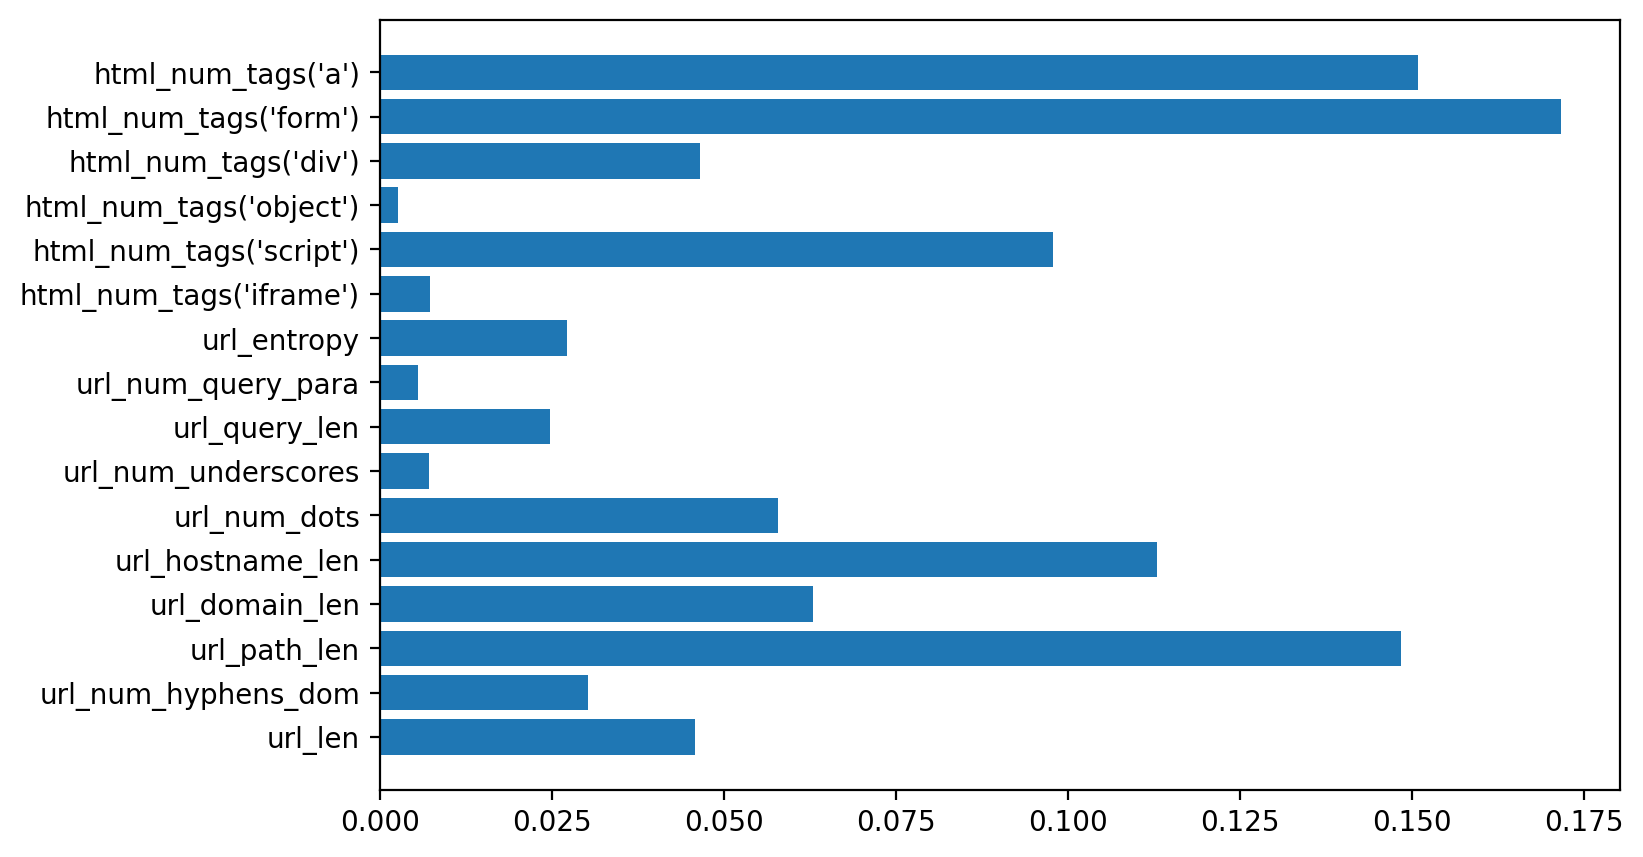

In [48]:
# 변수 중요도 시각화
plt.figure(figsize = (8, 5))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

In [49]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [50]:
# 예측하기
y_pred = model.predict(val_x)

In [51]:
# 성능평가
print(confusion_matrix(val_y, y_pred))
print(creport(val_y, y_pred))

[[307  11]
 [ 15 314]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       318
           1       0.97      0.95      0.96       329

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [52]:
# 학습 모델 저장
import joblib

In [53]:
joblib.dump(model, '.\RF_model.pkl')

['.\\RF_model.pkl']

- LightGBM

In [90]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
# 기본 모델 선언
model_dt = LGBMClassifier(max_depth = 5, random_state = 2023, verbose = -1)

# 파라미터 지정
param = {'max_depth' : range(1, 51),
               'n_estimators' : range(1, 21)}

# 모델 선언
model = GridSearchCV(model_dt,
                                    param,
                                    cv = 5,
                                    scoring = 'f1')

In [92]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=5, random_state=2023,
                                      verbose=-1),
             param_grid={'max_depth': range(1, 51),
                         'n_estimators': range(1, 21)},
             scoring='f1')

In [93]:
# 최적 파라미터, 예측 최고 성능
print('최적의 파라미터 :', model.best_params_)
print('예측 최고 성능 :', model.best_score_)

최적의 파라미터 : {'max_depth': 11, 'n_estimators': 19}
예측 최고 성능 : 0.9370528276961043


In [94]:
# 예측하기
y_pred = model.predict(val_x)

In [95]:
# 성능평가
print(confusion_matrix(val_y, y_pred))
print(creport(val_y, y_pred))

[[297  21]
 [ 19 310]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       318
           1       0.94      0.94      0.94       329

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



- XGBoost

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
# 기본 모델 선언
model_dt = XGBClassifier(max_depth = 5, random_state = 2023)

# 파라미터 지정
param = {'max_depth' : range(1, 51),
               'n_estimators' : range(1, 21)}

# 모델 선언
model = GridSearchCV(model_dt,
                                    param,
                                    cv = 5,
                                    scoring = 'f1')

In [81]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2023, ...),
             param_grid={'max_depth': range(1, 51),
                         'n_estimators': range(1, 21)},
             scoring='f1')

In [82]:
# 최적 파라미터, 예측 최고 성능
print('최적의 파라미터 :', model.best_params_)
print('예측 최고 성능 :', model.best_score_)

최적의 파라미터 : {'max_depth': 12, 'n_estimators': 20}
예측 최고 성능 : 0.9507854237844784


In [83]:
# 예측하기
y_pred = model.predict(val_x)

In [84]:
# 성능평가
print(confusion_matrix(val_y, y_pred))
print(creport(val_y, y_pred))

[[304  14]
 [ 15 314]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       318
           1       0.96      0.95      0.96       329

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



- 악성 사이트인지 아닌지 분류

In [96]:
train = pd.read_csv('train.csv')

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [98]:
# 중복 데이터 처리
train = train.drop_duplicates()
train = train.reset_index(drop= True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

In [99]:
# label_binary columns 생성
train['label_binary'] = train['label'].copy()

In [100]:
# 'benign'는 0으로, 'malicious'는 1로 변경
train['label_binary'] = train['label_binary'].replace(['benign', 'malicious'], [0, 1])
train['label_binary'].unique()

array([1, 0], dtype=int64)

In [101]:
# 결측치 처리 -> 결측치 하나라 제거
train = train.dropna(axis = 0)
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [102]:
# 상관관계확인 후 불필요한 변수 제거
cols = ["url_ip_present", "url_chinese_present","url_port",
            "html_num_tags('embed')","html_num_tags('head')",
            "html_num_tags('body')","html_num_tags('applet')", 'label']

train = train.drop(cols, axis = 1)
# train.head()

In [103]:
test = pd.read_csv('test.csv')

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [105]:
# 상관관계확인 후 불필요한 변수 제거
cols = ["url_ip_present", "url_chinese_present","url_port",
            "html_num_tags('embed')","html_num_tags('head')",
            "html_num_tags('body')","html_num_tags('applet')"]

test = test.drop(cols, axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  html_num_tags('iframe')  2441 non-null   int64  
 12  html_num_tags('script')  1974 non-null   float64
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

In [106]:
test = test.drop_duplicates()
test = test.reset_index(drop = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  html_num_tags('iframe')  2441 non-null   int64  
 12  html_num_tags('script')  1974 non-null   float64
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

In [107]:
# 최빈값 찾기
test["html_num_tags('script')"].mode()[0]

2.0

In [108]:
test['url_path_len'] = test['url_path_len'].fillna(0.0)
test['url_domain_len'] = test['url_domain_len'].fillna(17.0)
test['url_hostname_len'] = test['url_hostname_len'].fillna(17.0)
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(2.0)
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1.0)
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(0.0)

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             2441 non-null   float64
 4   url_domain_len           2441 non-null   float64
 5   url_hostname_len         2441 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  html_num_tags('iframe')  2441 non-null   int64  
 12  html_num_tags('script')  2441 non-null   float64
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

- scaling

In [110]:
max_n, min_n = train.max(), train.min()
max_n, min_n

(url_len                     1837.000000
 url_num_hyphens_dom           14.000000
 url_path_len                1816.000000
 url_domain_len               109.000000
 url_hostname_len             109.000000
 url_num_dots                  32.000000
 url_num_underscores           18.000000
 url_query_len                429.000000
 url_num_query_para             9.000000
 url_entropy                    5.821782
 html_num_tags('iframe')       26.000000
 html_num_tags('script')      267.000000
 html_num_tags('object')        8.000000
 html_num_tags('div')       19941.000000
 html_num_tags('form')         57.000000
 html_num_tags('a')         13451.000000
 label_binary                   1.000000
 dtype: float64,
 url_len                    6.000000
 url_num_hyphens_dom        0.000000
 url_path_len               0.000000
 url_domain_len             4.000000
 url_hostname_len           4.000000
 url_num_dots               1.000000
 url_num_underscores        0.000000
 url_query_len             

In [111]:
train = (train - min_n) / (max_n - min_n)
test = (test - min_n) / (max_n - min_n)

In [112]:
target = 'label_binary'

x = train.drop(target, axis = 1)
y = train.loc[:, target]

In [113]:
# train, test 데이터 분할할
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state= 2023)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [115]:
# 기본 모델 선언
model_dt = RandomForestClassifier(max_depth = 5, random_state= 2023)

# 파라미터 지정
param = {'max_depth' : [6, 8, 10, 12],
               'n_estimators' : [10, 100]}

# 모델 선언
model = GridSearchCV(model_dt,
                                    param,
                                    cv = 5,
                                    scoring = 'f1')

In [116]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=2023),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [10, 100]},
             scoring='f1')

In [117]:
# 최적 파라미터, 예측 최고 성능
print('최적의 파라미터 :', model.best_params_)
print('예측 최고 성능 :', model.best_score_)

최적의 파라미터 : {'max_depth': 12, 'n_estimators': 100}
예측 최고 성능 : 0.9469918630475306


In [118]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [119]:
# 예측하기
y_pred = model.predict(test_x)

In [120]:
# 성능평가
print(confusion_matrix(test_y, y_pred))
print(creport(test_y, y_pred))

[[308  10]
 [ 16 313]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       318
         1.0       0.97      0.95      0.96       329

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [121]:
joblib.dump(model, './RF_model.pkl')

['./RF_model.pkl']

In [122]:
test = pd.read_csv('test.csv')

In [123]:
# 상관관계확인 후 불필요한 변수 제거
cols = ["url_ip_present", "url_chinese_present","url_port",
            "html_num_tags('embed')","html_num_tags('head')",
            "html_num_tags('body')","html_num_tags('applet')"]

test = test.drop(cols, axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  html_num_tags('iframe')  2441 non-null   int64  
 12  html_num_tags('script')  1974 non-null   float64
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

In [124]:
test['url_path_len'] = test['url_path_len'].fillna(0.0)
test['url_domain_len'] = test['url_domain_len'].fillna(17.0)
test['url_hostname_len'] = test['url_hostname_len'].fillna(17.0)
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(2.0)
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1.0)
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(0.0)

In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             2441 non-null   float64
 4   url_domain_len           2441 non-null   float64
 5   url_hostname_len         2441 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  html_num_tags('iframe')  2441 non-null   int64  
 12  html_num_tags('script')  2441 non-null   float64
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

In [126]:
load_model = joblib.load('.\RF_model.pkl')

In [127]:
id = test['id']

In [128]:
test = test.drop('id', axis = 1)

In [129]:
y_pred = load_model.predict(test)
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [130]:
final = pd.DataFrame()

In [134]:
final['id'] = id

In [131]:
final['label'] = y_pred

In [132]:
final['label'] = final['label'].replace([0, 1], ['benign', 'malicious'])

In [135]:
final = final.set_index('id', drop = True)

In [136]:
final

,label
id,
0,malicious
1,malicious
2,benign
3,malicious
4,benign
...,...
2436,benign
2437,malicious
2438,malicious


In [137]:
final.value_counts()

label    
malicious    1620
benign        821
Name: count, dtype: int64

In [138]:
final.to_csv('submission.csv')

In [142]:
result = pd.read_csv('submission.csv')

In [143]:
# 분류 결과 확인인
result

,id,label
0,0,malicious
1,1,malicious
2,2,benign
3,3,malicious
4,4,benign
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,malicious
2439,2439,malicious
